In [92]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("dataTitanic").getOrCreate()
spark

In [135]:
# Membaca Data
df = spark.read.csv('titanic_train.csv', header=True, inferSchema=True)
print('Ukuran Dataset: ')
print('Jumlah Data  : ', df.count())
print('Jumlah Kolom : ', len(df.columns))
df.show()

Ukuran Dataset: 
Jumlah Data  :  891
Jumlah Kolom :  12
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|  

In [136]:
df.printSchema()   

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [137]:
# Cek missing value
from pyspark.sql.functions import col, isnan, when, count
df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



In [138]:
# menampilkan statistik data pada setiap kolom
df.toPandas().describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Berapa penumpang yang selamat?

In [139]:
display(df.groupBy("Survived").count().show())

+--------+-----+
|Survived|count|
+--------+-----+
|       1|  342|
|       0|  549|
+--------+-----+



None

lebih dari 60% (≈ 61,6%) penumpang tidak selamat.
(statistik ini juga dapat disimpulkan dari statistik deskriptif yang ditampilkan di atas).

**Bagaimana tingkat kelangsungan hidup berkorelasi dengan beberapa variabel/fitur:**

**Sex :**

In [142]:
df.groupBy("Sex","Survived").count().show()

+------+--------+-----+
|   Sex|Survived|count|
+------+--------+-----+
|  male|       0|  468|
|female|       1|  233|
|female|       0|   81|
|  male|       1|  109|
+------+--------+-----+



Hampir 65% wisatawan dari kumpulan data kami adalah laki-laki sedangkan 35% sisanya adalah perempuan.
Yang paling menonjol adalah persentase perbandingan antara perempuan dan laki-laki yang selamat: hampir 75% perempuan selamat sementara bahkan tidak 20% (≈18,9%) penumpang laki-laki berhasil selamat!

**Pclass:**

In [143]:
df.groupBy("Pclass","Survived").count().show()

+------+--------+-----+
|Pclass|Survived|count|
+------+--------+-----+
|     1|       0|   80|
|     3|       1|  119|
|     1|       1|  136|
|     2|       1|   87|
|     2|       0|   97|
|     3|       0|  372|
+------+--------+-----+



- Kelas 3 memiliki jumlah pemudik terbanyak, diikuti oleh kelas 1 dan kelas dengan penumpang paling sedikit adalah kelas 2. Jumlah penumpang di kelas 3 (yang paling tidak beruntung...) lebih banyak dari jumlah penumpang di kelas 1 dan kelas 2 digabungkan!

- Tingkat kelangsungan hidup sebenarnya dari seorang pelancong kelas1 adalah yang tertinggi (≈63%). Pelancong kelas 2 dan kelas 3 memiliki tingkat kelangsungan hidup aktual masing-masing 47,3% dan 24,2%.

**Age :**

[Text(0, 0.5, 'Number  of  Travelers'), Text(0.5, 0, 'Age Groups')]

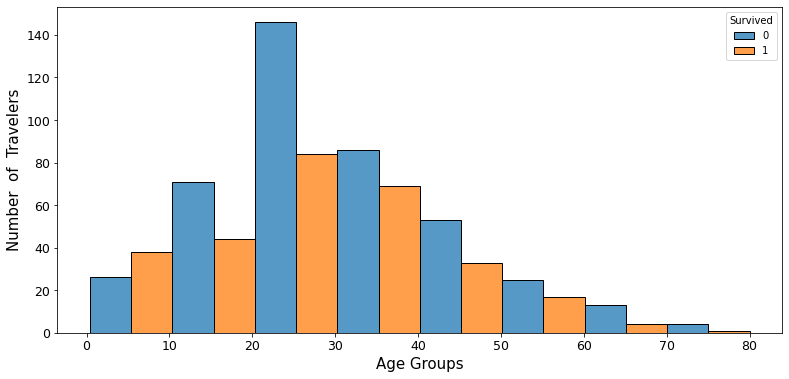

In [146]:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
df_pd = df.toPandas()
plt.rcParams["figure.figsize"] = (13,6)
plt.rcParams["axes.labelsize"] = 15
plt.tick_params(labelsize=12.5)
ax = sns.histplot(data=df_pd, x="Age", hue="Survived",  multiple="dodge", bins=8)
ax.set(xlabel='Age Groups',
       ylabel='Number  of  Travelers')

**Embarked:**

In [147]:
df.groupBy("Embarked","Survived").count().show()

+--------+--------+-----+
|Embarked|Survived|count|
+--------+--------+-----+
|    null|       1|    2|
|       Q|       1|   30|
|       S|       0|  427|
|       S|       1|  217|
|       C|       1|   93|
|       Q|       0|   47|
|       C|       0|   75|
+--------+--------+-----+



- Memulai menyiratkan Pelabuhan Embarkasi: C = Cherbourg; Q = Kota Queen; S = Southampton.

- Mayoritas pelancong, sekitar 72% naik dari Southampton. Sekitar 19% naik dari Cherbourg dan sisanya naik dari Queenstown (hampir 9%).

- Hanya penumpang yang naik dari Cherbourg yang memiliki peluang nyata untuk bertahan hidup lebih dari 50%. Pelancong yang naik dari Southampton memiliki peluang bertahan hidup paling kecil (≈33%).

In [148]:
df.groupBy('Embarked').count().show()

#mengatasi kolomm yang memiliki missing value pada kolom Embarked dengan nilai terbanyak
df= df.fillna({"Embarked" : 'S'})
#menghapus fitur yang tidak perlu
df= df.drop('PassengerID', 'Age', 'Cabin', 'Ticket')

#cek kembali missing value
df.select([count(when(col(c).isNull(),c)).alias(c) for c in df.columns]).show()

#menampilan data sesudah input missing value
df.show()

+--------+-----+
|Embarked|count|
+--------+-----+
|       Q|   77|
|    null|    2|
|       C|  168|
|       S|  644|
+--------+-----+

+--------+------+----+---+-----+-----+----+--------+
|Survived|Pclass|Name|Sex|SibSp|Parch|Fare|Embarked|
+--------+------+----+---+-----+-----+----+--------+
|       0|     0|   0|  0|    0|    0|   0|       0|
+--------+------+----+---+-----+-----+----+--------+

+--------+------+--------------------+------+-----+-----+-------+--------+
|Survived|Pclass|                Name|   Sex|SibSp|Parch|   Fare|Embarked|
+--------+------+--------------------+------+-----+-----+-------+--------+
|       0|     3|Braund, Mr. Owen ...|  male|    1|    0|   7.25|       S|
|       1|     1|Cumings, Mrs. Joh...|female|    1|    0|71.2833|       C|
|       1|     3|Heikkinen, Miss. ...|female|    0|    0|  7.925|       S|
|       1|     1|Futrelle, Mrs. Ja...|female|    1|    0|   53.1|       S|
|       0|     3|Allen, Mr. Willia...|  male|    0|    0|   8.05|       

In [149]:
#cek tipe data kembali
df.printSchema()

root
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Embarked: string (nullable = false)



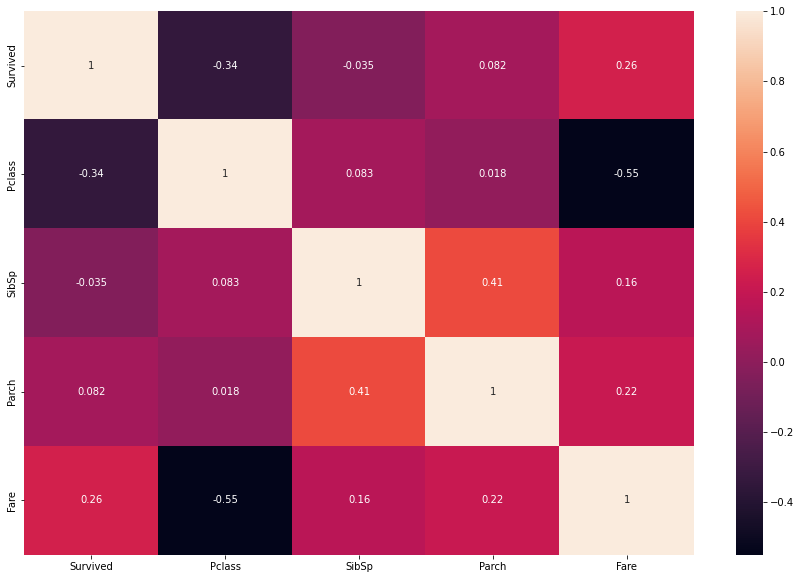

In [150]:
# Melihat korelasi antar fitur menggunakan plot Heatmap
data_corr = df.toPandas()
plt.figure(figsize=(15,10))
sns.heatmap(data_corr.corr(), annot=True)
plt.show()

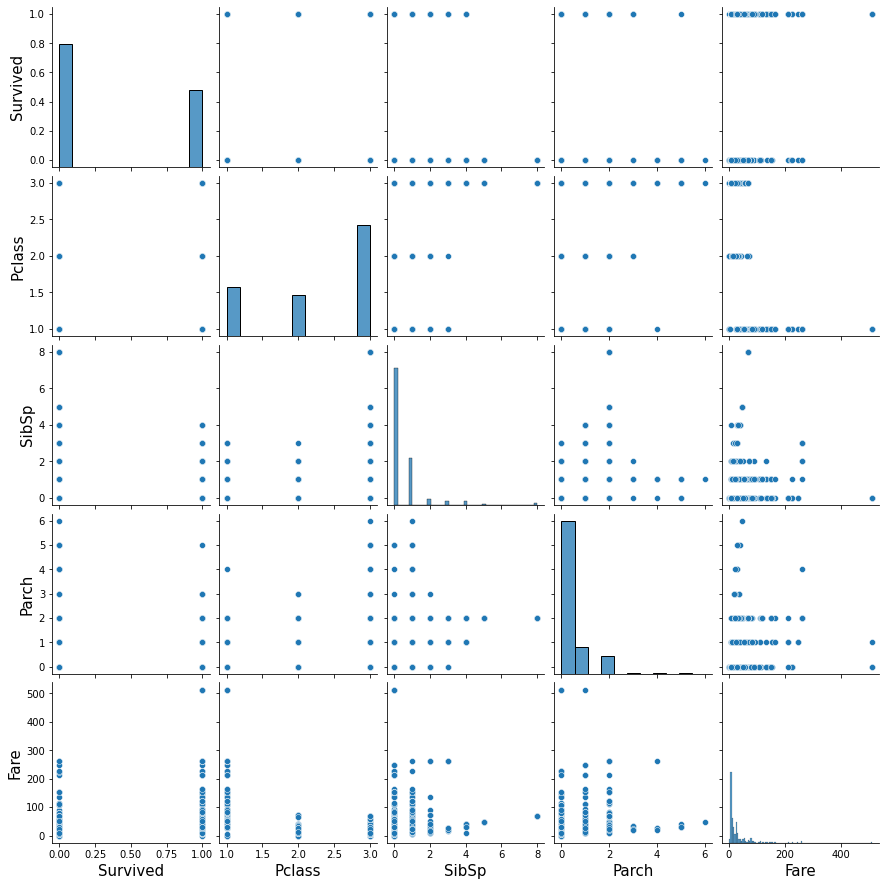

In [151]:
sns.pairplot(df.toPandas())


Buat fungsi untuk mengubah atribut kategorikal menjadi vektor biner dengan paling banyak satu nilai tunggal per baris yang menunjukkan indeks kategori input (menggunakan OneHotEncoder), kategori terakhir tidak disertakan secara default), tetapi pertama-tama konversikan data non-numerik ke data numerik (menggunakan StringIndexer):

Modelling

In [152]:
# Import library yang dibutuhkan
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier

In [154]:
numeric=['Pclass','Fare','SibSp','Parch']
assembler=VectorAssembler(inputCols=numeric,outputCol="features")
df_stage = assembler.transform(df)
df_stage = df_stage.select(['features', 'Survived'])
df_stage.show()

+--------------------+--------+
|            features|Survived|
+--------------------+--------+
|  [3.0,7.25,1.0,0.0]|       0|
|[1.0,71.2833,1.0,...|       1|
| [3.0,7.925,0.0,0.0]|       1|
|  [1.0,53.1,1.0,0.0]|       1|
|  [3.0,8.05,0.0,0.0]|       0|
|[3.0,8.4583,0.0,0.0]|       0|
|[1.0,51.8625,0.0,...|       0|
|[3.0,21.075,3.0,1.0]|       0|
|[3.0,11.1333,0.0,...|       1|
|[2.0,30.0708,1.0,...|       1|
|  [3.0,16.7,1.0,1.0]|       1|
| [1.0,26.55,0.0,0.0]|       1|
|  [3.0,8.05,0.0,0.0]|       0|
|[3.0,31.275,1.0,5.0]|       0|
|[3.0,7.8542,0.0,0.0]|       0|
|  [2.0,16.0,0.0,0.0]|       1|
|[3.0,29.125,4.0,1.0]|       0|
|  [2.0,13.0,0.0,0.0]|       1|
|  [3.0,18.0,1.0,0.0]|       0|
| [3.0,7.225,0.0,0.0]|       1|
+--------------------+--------+
only showing top 20 rows



Mari gabungkan daftar kolom yang kita minati ke dalam satu kolom vektor yang diberi nama 'fitur' dengan benar (menggunakan VectorAssembler):

Pembagian data

In [155]:
from pandas.core.common import random_state
train_data, test_data = df_stage.randomSplit([0.8,0.2],seed=42) 

**Evaluasi dan Akurasi Model**

In [156]:
evaluator = BinaryClassificationEvaluator(labelCol='Survived')
RandomForest = RandomForestClassifier(labelCol = 'Survived', predictionCol='prediction', seed=42)
#train model
rfmodel = RandomForest.fit(train_data)
pred = rfmodel.transform(test_data)

#AUC evaluate 
evaluator.evaluate(pred)
print("Test Area Under ROC :" ,evaluator.evaluate(pred))

#Akurasi Model
akurasi_model=rfmodel.summary
print("Akurasi Model :", akurasi_model.accuracy)

Test Area Under ROC : 0.7362440191387559
Akurasi Model : 0.739946380697051
